### Data Scientist Nanodegree
### CRISP-DM Process
### Project: CRISP-DM_Seattle AirBNB

### Objective:

Using CRISP-DM process find answers to some interesting that can be helpful in business point of view. Using the  
[Seattle AirBNB Data](https://www.kaggle.com/airbnb/seattle/data) to find answers to those questions.

#### CRISP-DM (Cross Industry Process for Data Mining) 

1. Business Understanding
2. Data Understanding
3. Data Preparation: 
4. Modeling
5. Evaluation
6. Deploy



### 1. Business Understanding

- **Ques 1:** Most important feature affecting rental price ?
- **Ques 2:** Top three neighbourhoods having highest and lowest rental price ?
- **Ques 3:** Top three months having the highest rental price ?
- **Ques 4:** Keywords to write a attractive description and amenities?

### 2. Data Understanding

In [59]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
import warnings; warnings.simplefilter('ignore')

#### Gather data

In [4]:
df_calendar = pd.read_csv("calendar.csv", )
df_listings = pd.read_csv("listings.csv")

#### Access data

#### 2.1 calender data set

In [29]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_calendar.shape

(1393570, 4)

In [6]:
# check availabily values
df_calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
# check relationship of listing price with availablility = 'f'
df_calendar[df_calendar['price'].isnull()]['available'].value_counts()

f    459028
Name: available, dtype: int64

In [8]:
# check relationship of listing price with availablility = 't'
df_calendar[df_calendar['price'].notnull()]['available'].value_counts()

t    934542
Name: available, dtype: int64

In [9]:
df_calendar[df_calendar['price'].notnull & df_calendar['price'].str.contains(',')]['price'].value_counts()

$1,000.00    370
$1,099.00    120
$1,650.00     91
$1,199.00     71
$1,450.00     28
$1,250.00     15
$1,240.00      2
Name: price, dtype: int64

##### Note:
listing_id: is numeric
date:       object type
available:  values ['t','f'] can be considered as True or False.
price:      listing price on respective date if 'available' is 't'.

##### Data issues 

1. date: Convert date into date type. Will be helpful for further analysis.
2. available: values ['t','f'] can be considered into [0,1] respectively.
3. price values contains '$' and ',' that can be removed and then convert the price into float type.  

#### 2.2 Listings date set

In [10]:
df_listings.shape

(3818, 92)

In [11]:
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 50)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [13]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [86]:
# Investigate patterns in the amount of missing data in each column.
features = df_listings.columns
percent_missing = round(df_listings.isnull().mean()*100,0).astype(int)
missing_value_df = pd.DataFrame.from_dict({'Feature': features,
                                 'percent_missing': percent_missing})

In [87]:
missing_value_df[missing_value_df['percent_missing'] != 0].sort_values(by=['percent_missing'], ascending=False)

,Feature,percent_missing
license,license,100
square_feet,square_feet,97
monthly_price,monthly_price,60
security_deposit,security_deposit,51
weekly_price,weekly_price,47
notes,notes,42
cleaning_fee,cleaning_fee,27
neighborhood_overview,neighborhood_overview,27
transit,transit,24
host_about,host_about,22


##### Data issue in listings data set

**Note:** 
1. Here so much of rough work is done in order to find details of these feature (like finding the number of missing rows, finding the unique values in a feature) but the **rough code is not shown here**.
2. **Consider droping features having missing values 15% or above.** 


- **id:** this is the listing id and can be mapped with listing_id in calender date set. Convert 'id' into string.
- **listing_url:** no missing values but unnecessary feature. Can be dropped.
- **scrape_id:** drop this fetaure. It seems unnecessary for further analysis.
- **last_scraped:** date format 'YYYY-MM-DD'. keep as it is for now.
- **name:** keep as it is.
- **summary:** keep as it is.
- **space:** unnecessary feature can be dropped.
- **description:** keep as it is.
- **experiences_offered:** drop as this feature has only one value 'none'.
- **neighborhood_overview:** neighbourhood description, drop as it has 27% missing.
- **notes:** 42% values are missing. Drop this feature,
- **transit:** description of neighbourhood and facilities provided. It's a mixed description and 24% values are missing that's why drop it.
- **picture_url, thumbnail_url, medium_url and xl_picture_url:** picture_url, thumbnail_url, medium_url and xl_picture_url looks same image but in different sizes. The availability of value is not same. These features can be useful if we convert it into [0,1]. 1 if value is available else 0. But seems not use ful so drop these features.
- **host_id:** host with multiple listing_id. Convert it into string. But not useful drop it.
- **host_url:** looks it is the url to host profile page. Can be dropped.
- **host_name:** This is the first name of host. But we can drop this feature as first name is not a unique identity for unique identity we already have host_id.
- **host_since:** Date when the host create his/her profile on listing website. This feature will be more useful if we convert it into the number of days between host_since (date) and today date.
- **host_location:** The format of the information is "city, state, country" but the format is not consistant. It needs to be fixed and also have 0.2% of missing values. unecessary feature drop it.
- **host_about:** drop this feature as it is having 22% missing values.
- **host_response_time:** the response time of host is a categorical and can be encode as below
                            {   1: "within an hour",
                                2: "within a few hours",
                                3: "within a day",
                                4: "a few days or more"}
                         but there are 14% can be encoded as 4 ("a few days or more").
- **host_response_rate:** is in percentage between minimum 38% and maximum 100%. Here we can convert this feature into floatby removing '%' sign.
- **host_acceptance_rate:** The meaning of this feature is not clear by it's values (80% values as '100%' except one that is 0%) and remaining 20% are missing values. drop this feature.
- **host_is_superhost:** if a host is rated as superhost by the quest or not (values ['t',f']). Having 0.05% missing values. Can be converted as 'f'/NaN ==> 0 and 't' == 1.
- **host_thumbnail_url:** image url for host in thumbnail size. Can be dropped.
- **host_picture_url:** this feature seems the same images as host_thumbnail_url. We can drop this feature.
- **host_neighbourhood:** categorical feature with 8% missing value through out the host_id. Mean if value is missing then it is missing for listings for that host_id. Drop missing rows.
- **host_listings_count:** counts of listings for each host_id
- **host_total_listings_count:** same values as in host_listings_count. Can drop this feature.
- **host_verifications:** each value is a list of verification type. All the uniques verification type can be converted new feature and mark them 1.
- **host_has_profile_pic:** indicator for host profile picture 't'/'f'.
- **host_identity_verified:** indicator if host identity is verified 't'/'f'.
- **street:** street address seems not useful. Can be dropped. 
- **neighbourhood:** neighbourhood name with 11% missing value. how to fix these missing value is not clear as if we impute these rows with some values may be that will not match with the street address. Seems that the next feature "neighbourhood_cleansed" is a replacement for "neighbourhood". Can be dropped.
- **neighbourhood_cleansed:** can be useful as it has no missing values. And it seems that neighbourhood feature is cleaned. neighbourhood_group_cleansed seems to be rollup level for this feature. Keep it as it is.
- **neighbourhood_group_cleansed:** This feature seems to be the rollup level for "neighbourhood_cleansed" with no missing values and divided into few group of neighbourhood. Using this feature will be far better as it has few unique values. 
- **city:** city names with no missing values. Just one value "西雅图" in chinese language that translates to "Seattle". Can be fixed.
- **state:** has only two values "WA" and "wa" for "Washington". As it has only "Washington" has unique value, we can drop this feature. 
- **zipcode:** zipcode seem ok just one incorrect value "99\n98122", can be converted to "98122". This is categorical type with 7 missing value can drop these rows. But this feature is unnecessary can be dropped.
- **market:**  has only one unique value "Seattle". Can be dropped.
- **smart_location:** format is district, city, state. Can be dropped.
- **country_code:** has only one unique value "US". Can be dropped.
- **country:** has only one unique value "United States". Can be dropped.
- **latitude:** values look ok but this feature is not useful until we try to pin point the location on map. Can be dropped.
- **longitude:** values look ok but this feature is not useful until we try to pin point the location on map. Can be dropped.
- **is_location_exact:** indicator ['t','f'], if the location is correct. Not useful can be dropped. 
- **property_type:** Good feature with limited unique values and have a missing value this rows can be dropped.
- **room_type:** This seems to be a good feature with limited unique values.
- **accommodates:** allowed number of person sharing. 
- **bathrooms:** number of bathrooms in house. 16 missing values can be encoded as 0.
- **bedrooms:** number of bedrooms in house. 6 missing values can be encoded as 0.
- **beds:** number of beds in room. 1 missing values can be encoded as 1.
- **bed_type:** Good feature with limited unique values and no missing value
- **amenities:** Descriptive text, Can be useful for further analysis. Encode into One-Hot key.
- **square_feet:** measure of area in square feet with 97% missing values. Drop this feature.
- **price:** price in string format. Remove "\$" and ",". And convert into int/float. 
- **weekly_price:** price for a week in string format with 47% missing value. Drop this feature.
- **monthly_price:** monthly price similar as weekly_price with 60% missing value. Drop this feature.
- **security_deposit:** 51% missing values. Drop this feature.
- **cleaning_fee:** 27% missing values. Drop this feature.
- **guests_included:** number of guests.
- **extra_people:** charges in dollar applicable for each extra person. Remove '$' and convert into int/float.
- **minimum_nights:** minimum number of nights for stay.
- **maximum_nights:** maximum number of nights for stay.
- **calendar_updated:** this feature is a categorical and this can be converted as 1 if calendar_updated 'today' else 0.
- **has_availability:** this feature has only one value. Drop this feature.
- **availability_30:** unnecessary feature can be dropped. 
- **availability_60:** unnecessary feature can be dropped.
- **availability_90:** unnecessary feature can be dropped.
- **availability_365:** unnecessary feature can be dropped.
- **calendar_last_scraped:** this feature has only one value. Can be dropped.
- **number_of_reviews:** unnecessary feature can be dropped.
- **first_review:** first review date. Unnecessary feature can be dropped.
- **last_review:** last review date. unnecessary feature can be dropped.
- **review_scores_rating:** scale of 100 with 17% missing values. Can be dropped.
- **review_scores_accuracy:** scale of 10 with 17% missing values. Can be dropped.
- **review_scores_cleanliness:** scale of 10 with 17% missing values. Can be dropped.
- **review_scores_checkin:** scale of 10 with 17% missing values. Can be dropped.
- **review_scores_communication:** scale of 10 with 17% missing values. Can be dropped.
- **review_scores_location:** scale of 10 with 17% missing values. Can be dropped.
- **review_scores_value:** scale of 10 with 17% missing values. Can be dropped.
- **requires_license:** this feature has only one value 'f'. Can be dropped.
- **license:** 100% missing values. Drop this feature.
- **jurisdiction_names:** has only one value "WASHINGTON". Can be dropped.
- **instant_bookable:** has two values ['f', 't']. Can be encoded [0, 1].
- **cancellation_policy:** has three values ['flexible', 'moderate', 'strict']. Keep as it is.
- **require_guest_profile_picture:** has two values ['f', 't'] can be encoded as [0, 1]
- **require_guest_phone_verification:** has two values ['f', 't'] can be encoded as [0, 1]
- **calculated_host_listings_count:** number of host listings.
- **reviews_per_month:** number of review per month. Unnecessary feature can be dropped.

### 3. Data Preparation

#### 3.1 calender dataset: clean the data and prepare it for further analysis by applying following steps:
* The 'Price' in dataset "calender" contains '$' and ','. Remove these characters and convert it to datatype float.
* Feature 'available' has values 't' and 'f'. Can be converted into [1,0].
* For further analysis, create new features 'day-of-week', 'month' and 'year' using feature 'date'. 

In [7]:
# create function to clean calender dataset

def clean_calender(df_cal):
    '''
    Function to apply cleansing steps on calender dataset and engineer new features namely "day-of-week",
    "month", "year".
    
    Parameters:
    df_cal (pandas dataframe): calender dataframe
    
    Returns:
    dataframe with cleansed data and newly generated features   
    
    '''
    
    # make a copy
    df = df_cal.copy()
    
    # apply cleansing steps
    df['price'] = df['price'].str.lstrip('$').str.replace(',','')
    df['price'] = df['price'].fillna(0.00).astype(float)
    df['available'] = df['available'].apply(lambda x: 1 if x == 't' else 0).astype('int32')

    # Engineer Feature day-of-week, month, year 
    look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
               6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    
    df['date'] = pd.to_datetime(df['date'])
    df['day-of-week'] = df['date'].dt.weekday_name
    df['month'] = df['date'].dt.month.apply(lambda x: look_up[x])
    df['year'] = df['date'].dt.year
    
    return df


In [8]:
#df_calendar_copy = df_calendar.copy()
df_calendar_clean = clean_calender(df_calendar)
df_calendar_clean.head()

,listing_id,date,available,price,day-of-week,month,year
0,241032,2016-01-04,1,85.0,Monday,Jan,2016
1,241032,2016-01-05,1,85.0,Tuesday,Jan,2016
2,241032,2016-01-06,0,0.0,Wednesday,Jan,2016
3,241032,2016-01-07,0,0.0,Thursday,Jan,2016
4,241032,2016-01-08,0,0.0,Friday,Jan,2016


In [9]:
# save clean calendar data set to pickle file
df_calendar_clean.to_pickle('calendar_clean.pkl')

#### 3.2 listings dataset: clean the data and prepare it for further analysis by applying following steps:

##### 3.2.1 handle missing values
* Drop features having 15% or above missing values.
     - space, 
     - neighborhood_overview
     - notes
     - transit
     - host_about
     - host_acceptance_rate
     - square_feet
     - weekly_price
     - monthly_price
     - security_deposit
     - cleaning_fee
     - first_review
     - last_review
     - review_scores_rating
     - review_scores_accuracy
     - review_scores_cleanliness
     - review_scores_checkin
     - review_scores_communication
     - review_scores_location
     - review_scores_value
     - license
     - reviews_per_month
     
* Drop other unnecessary features includes:
    - id
    - name
    - listing_url
    - scrape_id
    - summary
    - space
    - experiences_offered
    - picture_url
    - thumbnail_url
    - medium_url
    - xl_picture_url
    - host_id
    - host_url
    - host_name
    - host_picture_url
    - host_listings_count
    - host_has_profile_pic
    - host_identity_verified
    - host_location
    - host_neighbourhood
    - host_thumbnail_url
    - host_total_listings_count
    - street
    - neighbourhood
    - state
    - zipcode
    - market
    - smart_location
    - country_code
    - country
    - latitude
    - longitude
    - is_location_exact
    - has_availability
    - availability_30
    - availability_60
    - availability_90
    - availability_365
    - calendar_last_scraped
    - number_of_reviews
    - requires_license
    - jurisdiction_names

* Drop row for missing values for the follow features:
    - host_response_rate
    - host_response_time
    - property_type


In [88]:
# features having 15% or above missing values
missing_value_df[missing_value_df['percent_missing'] >= 15]['Feature'].unique()

array(['space', 'neighborhood_overview', 'notes', 'transit', 'host_about',
       'host_acceptance_rate', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'], dtype=object)

In [135]:
# Drop feature with more than 14% missing values
df_listings_reduced = df_listings.loc[:, df_listings.isnull().mean() < .15].copy()

In [136]:
# Drop features 'experiences_offered' is all 'none' and 'summary' seems not useful not useful.
df_listings_reduced = df_listings_reduced.drop(['id', 'name','last_scraped','listing_url','scrape_id', 'summary',
                                                'space', 
                                                'experiences_offered', 'picture_url','thumbnail_url', 'medium_url',
                                                'xl_picture_url', 'host_id',
                                                'host_url', 'host_name', 'host_location','host_picture_url', 
                                                'host_thumbnail_url', 'host_listings_count', 'host_has_profile_pic',
                                                'host_identity_verified', 'host_neighbourhood',
                                                'host_total_listings_count', 'street', 'neighbourhood', 'state',
                                                'zipcode', 'market', 'smart_location', 'country_code', 'country',
                                                'latitude', 'longitude', 'is_location_exact', 'has_availability',
                                                'availability_30', 'availability_60',
                                                'availability_90', 'availability_365', 'calendar_last_scraped',
                                                'number_of_reviews', 'requires_license', 'jurisdiction_names'], axis=1)

In [137]:
df_listings_reduced['missing_values_count'] = df_listings_reduced.isnull().sum(axis=1)
df_listings_reduced[df_listings_reduced['missing_values_count'] > 10].shape[0]

0

* There is no rows having more than 10 missing values. 

In [138]:
# check the remaining features with missing values 
df_listings_reduced[df_listings_reduced['missing_values_count'] != 0].sort_values(by=['missing_values_count'],\
                                                                                  ascending=False)

,description,host_since,host_response_time,host_response_rate,host_is_superhost,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,city,property_type,...,extra_people,minimum_nights,maximum_nights,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,missing_values_count
1297,A studio with stunning waterfront view worth t...,NaN,NaN,NaN,NaN,None,Belltown,Downtown,Seattle,Apartment,...,$25.00,2,13,2 months ago,f,moderate,f,f,1,4
1419,Beautiful building near the heart of downtown ...,NaN,NaN,NaN,NaN,None,Belltown,Downtown,Seattle,Apartment,...,$0.00,1,1125,a week ago,f,flexible,f,f,1,4
2717,We have a nice bedroom divided in two differen...,2012-10-18,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",Broadway,Capitol Hill,Seattle,House,...,$0.00,1,1125,3 months ago,f,flexible,f,f,1,3
3337,We occasionally rent out place out when we...,2012-09-19,NaN,NaN,f,"['email', 'phone', 'facebook', 'kba']",North College Park,Northgate,Seattle,House,...,$0.00,4,1125,3 months ago,f,flexible,f,f,1,3
3,A charming apartment that sits atop Queen Anne...,2013-11-06,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",West Queen Anne,Queen Anne,Seattle,Apartment,...,$0.00,1,1125,6 months ago,f,flexible,f,f,1,2
2806,"Enjoy a small getaway with views of the Sound,...",2014-09-12,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",Broadway,Capitol Hill,Seattle,Apartment,...,$0.00,2,10,2 months ago,f,moderate,f,f,1,2
2786,"Listing is for a large, airy, beautifully fini...",2014-01-03,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",Broadway,Capitol Hill,Seattle,Apartment,...,$25.00,2,1125,5 days ago,f,flexible,f,f,1,2
2788,"Our home is cozy and comfortable, with room to...",2015-11-11,NaN,NaN,f,"['email', 'phone']",Broadway,Capitol Hill,Seattle,Condominium,...,$10.00,1,1125,2 months ago,f,flexible,f,f,1,2
2789,Delightful spacious entire apartment in the he...,2015-06-13,NaN,NaN,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",Broadway,Capitol Hill,Seattle,Apartment,...,$0.00,2,1125,4 months ago,f,moderate,f,f,1,2
2815,Enjoy your annual L-tryptophan snooze in this ...,2015-06-10,NaN,NaN,f,"['phone', 'facebook']",Broadway,Capitol Hill,Seattle,House,...,$35.00,2,5,3 months ago,f,strict,f,f,1,2


In [139]:
num_missing_value = df_listings_reduced['missing_values_count'].sum()
total_values =  df_listings_reduced.shape[0]*df_listings_reduced.shape[1]
print('Percentage of data still missing: {}'.format((num_missing_value/total_values)*100))


Percentage of data still missing: 0.9699969292462203


In [94]:
features = df_listings_reduced.columns
percent_missing = round(df_listings_reduced.isnull().mean()*100,3).astype(float)
missing_value_df2 = pd.DataFrame.from_dict({'Feature': features,
                                 'percent_missing': percent_missing})

In [95]:
# check how much data is still missing in each feature
missing_value_df2[missing_value_df2['percent_missing'] > 0.0].sort_values(by=['percent_missing'], ascending=False)

,Feature,percent_missing
host_response_time,host_response_time,13.698
host_response_rate,host_response_rate,13.698
bathrooms,bathrooms,0.419
bedrooms,bedrooms,0.157
host_since,host_since,0.052
host_is_superhost,host_is_superhost,0.052
property_type,property_type,0.026
beds,beds,0.026


In [96]:
# drop rows having missing values for host_response_time, host_response_rate and host_neighbourhood and property_type
df_listings_reduced = df_listings_reduced.dropna(axis=0, subset=['host_response_rate',\
                                                                 'host_response_time', 'property_type'])

In [97]:
# number of still missing values in each feature
df_listings_reduced.isnull().sum()

id                                   0
name                                 0
description                          0
host_since                           0
host_response_time                   0
host_response_rate                   0
host_is_superhost                    0
host_verifications                   0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
city                                 0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           14
bedrooms                             6
beds                                 1
bed_type                             0
amenities                            0
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
calendar_updated                     0
instant_bookable         

* other missing values will be fixed when when we will encode those columns 

##### 3.2.2  Features cleansing and encoding

- **host_since:** This feature will be more useful if we convert it into the number of days between host_since (date) and today date.
- **host_response_time:** the response time of host is a categorical and can be encode as below
                            {   1: "within an hour",
                                2: "within a few hours",
                                3: "within a day",
                                4: "a few days or more"}
                         but there are 14% can be encoded as 4 ("a few days or more").
- **host_response_rate:** is in percentage between minimum 38% and maximum 100%. Here we can convert this feature into float by removing '%' sign.
- **host_is_superhost:** if a host is rated as superhost by the quest or not (values ['t',f']). Having 0.05% missing values. Can be converted as 'f'/NaN ==> 0 and 't' == 1.
- **city:** city names with no missing values. Just one value "西雅图" in chinese language that translates to "Seattle". Can be fixed. Row dropped alread. But it seems not much useful drop this feature.
- **amenities:** Descriptive text, Can be useful for further analysis. convert into dummy variables.
- **bathrooms:** number of bathrooms in house. 16 missing values can be imputed as 1.
- **bedrooms:** number of bedrooms in house. 6 missing values can be imputed as 1.
- **beds:** number of beds in room. 1 missing values can be imputed as 1.
- **price:** price in string format. Remove "\$" and ",". And convert into int/float. 
- **calendar_updated:** this feature is a categorical and this can be converted as 1 if calendar_updated 'today' else 0.
- **instant_bookable:** has two values ['f', 't']. Can be encoded [0, 1].
- **require_guest_profile_picture:** has two values ['f', 't'] can be encoded as [0, 1]
- **require_guest_phone_verification:** has two values ['f', 't'] can be encoded as [0, 1]


In [100]:
# drop city
df_listings_reduced = df_listings_reduced.drop('city', axis=1)

In [41]:
# function to find number of days between two dates 

def get_date_diff(d0, d1):
    '''
        function to find the number of days between two dates
        
        Parameters:
        d0 (string): Start date 
        d1 (string): End dates
        
        Returns:
        int : Difference between dates in number of days
    '''
    
    date_format = "%Y-%m-%d"
    d0 = datetime.strptime(d0, date_format)
    d1 = datetime.strptime(d1, date_format)

    delta = d1 - d0
    return (delta.days)

get_date_diff('2016-01-04', '2017-01-05')

367

In [101]:
# Convert ['host_since'] in to number of days
date_format = "%Y-%m-%d"
now = datetime.now()
now = now.strftime('%Y-%m-%d')

df_listings_reduced['host_since'] = df_listings_reduced['host_since'].apply(lambda x: get_date_diff(str(x), now))

In [102]:
# unique values in host_response_time
df_listings_reduced['host_response_time'].unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

In [103]:
# encode host_response_time
df_listings_reduced['host_response_time'] = df_listings_reduced['host_response_time'].replace({
    'within an hour': '1',
    'within a few hours': '2',
    'within a day': '3',
    'a few days or more': '4',
    
})
df_listings_reduced['host_response_time'].value_counts()

1    1692
2     967
3     597
4      38
Name: host_response_time, dtype: int64

In [104]:
# check for missing values in host_response_time
assert(df_listings_reduced['host_response_time'].isnull().sum() == 0)

In [105]:
# clean host_response_rate
df_listings_reduced['host_response_rate'].unique()

array(['96%', '98%', '67%', '100%', '71%', '97%', '60%', '50%', '31%',
       '90%', '70%', '88%', '80%', '63%', '33%', '99%', '75%', '83%',
       '94%', '58%', '43%', '93%', '92%', '40%', '57%', '89%', '95%',
       '78%', '81%', '91%', '38%', '86%', '30%', '56%', '76%', '64%',
       '82%', '17%', '87%', '25%', '69%', '53%', '65%', '68%', '55%'],
      dtype=object)

In [106]:
# encode host_response_rate 
df_listings_reduced['host_response_rate'] = df_listings_reduced['host_response_rate'].str.rstrip('%').astype('int32')

In [107]:
df_listings_reduced['host_response_rate'].unique()

array([ 96,  98,  67, 100,  71,  97,  60,  50,  31,  90,  70,  88,  80,
        63,  33,  99,  75,  83,  94,  58,  43,  93,  92,  40,  57,  89,
        95,  78,  81,  91,  38,  86,  30,  56,  76,  64,  82,  17,  87,
        25,  69,  53,  65,  68,  55])

In [108]:
# clean host_is_superhost
df_listings_reduced['host_is_superhost'].unique()

array(['f', 't'], dtype=object)

In [109]:
# encode host_is_superhost
df_listings_reduced['host_is_superhost'] = df_listings_reduced['host_is_superhost'].apply(\
                                                                                          lambda x: 1 if x == 't' else 0\
                                                                                         ).astype('int32')

In [110]:
# check host_is_superhost
df_listings_reduced['host_is_superhost'].unique()

array([0, 1])

In [111]:
# fix missing values of bathrooms, bedrooms and beds
df_listings_reduced.loc[df_listings_reduced['bathrooms'].isnull(), 'bathrooms'] = 0
df_listings_reduced.loc[df_listings_reduced['bedrooms'].isnull(), 'bedrooms'] = 0
df_listings_reduced.loc[df_listings_reduced['beds'].isnull(), 'beds'] = 1


df_listings_reduced['bathrooms'] = df_listings_reduced['bathrooms'].astype('int32')
df_listings_reduced['bedrooms'] = df_listings_reduced['bedrooms'].astype('int32')
df_listings_reduced['bedrooms'] = df_listings_reduced['beds'].astype('int32')

In [112]:
df_listings_reduced['bathrooms'].unique()

array([1, 4, 2, 3, 0, 8, 5])

In [113]:
df_listings_reduced['bedrooms'].unique()

array([ 1,  7,  3, 15,  2,  4,  5,  6,  9,  8, 10])

In [114]:
df_listings_reduced['beds'].unique()

array([ 1.,  7.,  3., 15.,  2.,  4.,  5.,  6.,  9.,  8., 10.])

In [115]:
# clean 
df_listings_reduced['price'] = df_listings_reduced['price'].apply(lambda p: str(p).replace('$','').replace(',','')).astype(float)
df_listings_reduced['extra_people'] = df_listings_reduced['extra_people'].apply(lambda p: str(p).replace('$','').replace(',','')).astype(float)

In [116]:
df_listings_reduced['price'].unique()

array([ 85., 150., 975., 450.,  80.,  60.,  95.,  99., 245., 165., 461.,
       109.,  66., 110.,  45., 300., 175., 325., 222., 159., 125., 348.,
       148., 100., 349., 130., 145.,  90., 170., 465.,  50.,  59.,  47.,
        70.,  55.,  65.,  25.,  40., 149., 129., 105., 218., 126., 115.,
       225.,  89., 134., 375.,  97., 197., 120., 200., 135.,  69., 195.,
       224., 338.,  79.,  49.,  75.,  57.,  96., 350.,  53.,  35., 133.,
        52., 275., 199., 180., 435., 250., 116.,  39.,  98.,  73., 190.,
        68., 196., 209., 749., 285., 600., 235., 103., 143., 142., 295.,
       335., 499., 156.,  94., 160., 219.,  91.,  74., 140., 104., 122.,
       158.,  42., 185., 119., 575., 139., 259., 166., 210., 439., 400.,
       155.,  54., 254., 310., 215., 490., 255., 144., 445., 395.,  88.,
       425., 114., 117., 107.,  76., 179.,  84., 265., 249.,  92., 550.,
       111., 141., 775.,  78.,  48.,  82.,  58., 240., 500.,  41.,  43.,
        44., 112.,  28.,  93.,  29.,  83., 118., 12

In [117]:
df_listings_reduced['extra_people'].unique()

array([  5.,   0.,  25.,  15.,  10.,  20.,  50.,  60.,  75.,  30., 100.,
        35.,  40.,  45.,   7.,  14.,  55.,  29.,  12.,  19.,   8.,  21.,
        17.,  44.,   9., 200.,  28.,  85., 250.,  18.,  13.,  16., 300.,
        33.,  49.,  22.,  27.,  68.,  71.,  48.,   6.,  80.,  36., 175.])

In [118]:
# unique values in calendar_updated
df_listings_reduced['calendar_updated'].unique()

array(['4 weeks ago', 'today', '5 weeks ago', '7 weeks ago', 'yesterday',
       'a week ago', '2 weeks ago', '5 days ago', '3 days ago',
       '2 months ago', '4 days ago', '5 months ago', '2 days ago',
       '3 weeks ago', '1 week ago', '6 weeks ago', '3 months ago',
       'never', '6 days ago', '4 months ago', '8 months ago',
       '10 months ago', '14 months ago', '7 months ago', '6 months ago',
       '9 months ago', '12 months ago'], dtype=object)

In [119]:
# encode calendar_updated if updated today as 1 else 0
df_listings_reduced[['calendar_updated']] = np.where(df_listings_reduced[['calendar_updated']] == 'today'\
                                                     , 1, 0).astype('int32')

In [120]:
# check encoded values
df_listings_reduced['calendar_updated'].unique()

array([0, 1])

In [121]:
# unique values in calendar_updated
df_listings_reduced['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [122]:
# encode instant_bookable 't' as 1 else 0
df_listings_reduced[['instant_bookable']] = np.where(df_listings_reduced[['instant_bookable']] == 't' \
                                                     , 1, 0).astype('int32')

In [123]:
# check encoded values
df_listings_reduced['instant_bookable'].unique()

array([0, 1])

In [124]:
# unique values in require_guest_profile_picture
df_listings_reduced['require_guest_profile_picture'].unique()

array(['f', 't'], dtype=object)

In [125]:
# encode require_guest_profile_picture
df_listings_reduced[['require_guest_profile_picture']] = np.where(\
                                                                  df_listings_reduced[['require_guest_profile_picture']] 
                                                                  == 't', 1, 0).astype('int32')

In [126]:
# check require_guest_profile_picture
df_listings_reduced['require_guest_profile_picture'].unique()

array([0, 1])

In [128]:
# check unique values in require_guest_phone_verification
df_listings_reduced['require_guest_phone_verification'].unique()

array(['f', 't'], dtype=object)

In [129]:
# encode require_guest_profile_picture and require_guest_phone_verification
df_listings_reduced[['require_guest_phone_verification']] = np.where(\
                                                                  df_listings_reduced[['require_guest_phone_verification']] 
                                                                  == 't', 1, 0).astype('int32')

In [130]:
# check require_guest_phone_verification
df_listings_reduced['require_guest_phone_verification'].unique()

array([0, 1])

In [131]:
# check if data set still have missing value
assert(df_listings_reduced.isnull().sum().sum() == 0)

In [132]:
# clean host_verifications
df_listings_reduced['host_verifications'].unique()

array(["['email', 'phone', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",
       "['email', 'phone', 'google', 'reviews', 'jumio']",
       "['email', 'phone', 'facebook', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']",
       "['email', 'phone', 'linkedin', 'reviews', 'jumio']",
       "['email', 'reviews', 'kba']",
       "['email', 'phone', 'facebook', 'reviews']",
       "['phone', 'reviews']",
       "['email', 'phone', 'facebook', 'reviews', 'jumio']",
       "['email', 'phone', 'reviews', 'jumio', 'kba']",
       "['email', 'phone', 'facebook', 'google', 'reviews', 'jumio']",
       "['email', 'phone', 'reviews']",
       "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'reviews', 'jumio']",
       "['email', 'phone', 'google', 'kba']",
       "['email', 'phone', 'linkedin', 'reviews', 'kba']",
       "['email', 'phone', 'facebo

In [213]:
# for now separate host_verifications
# clean host_verifications, description and amenities
df_descriptive_features = df_listings_reduced[['host_verifications','description', 'amenities']].copy()
df_listings_reduced = df_listings_reduced.drop(['host_verifications','description', 'amenities'], axis=1)

#### Apply Clean steps all together

In [163]:
# create function to apply cleansing steps on listings dataset

def clean_listings(df_listings):
    '''
    function to apply cleansing steps on listings dataset
    and create a separate data frame for descriptive features
    
    Parameters:
    df_listings: listings dataframe
    
    Returns:
    df: cleansed listings dataframe
    df_descriptive_features: dataframe for descriptive features  
    
    '''

    df = df_listings.copy()
    # Drop feature with more than 14% missing values
    df = df.loc[:, df.isnull().mean() < .15].copy()

    # Drop features 'experiences_offered' is all 'none' and 'summary' seems not useful not useful.
    df = df.drop(['id', 'name','last_scraped','listing_url','scrape_id', 'summary',
                                                'space', 'city',
                                                'experiences_offered', 'picture_url','thumbnail_url', 'medium_url',
                                                'xl_picture_url', 'host_id',
                                                'host_url', 'host_name', 'host_location','host_picture_url', 
                                                'host_thumbnail_url', 'host_listings_count', 'host_has_profile_pic',
                                                'host_identity_verified', 'host_neighbourhood',
                                                'host_total_listings_count', 'street', 'neighbourhood', 'state',
                                                'zipcode', 'market', 'smart_location', 'country_code', 'country',
                                                'latitude', 'longitude', 'is_location_exact', 'has_availability',
                                                'availability_30', 'availability_60',
                                                'availability_90', 'availability_365', 'calendar_last_scraped',
                                                'number_of_reviews', 'requires_license', 'jurisdiction_names'], axis=1)



    # drop rows having missing values for host_response_time, host_response_rate and host_neighbourhood and property_type
    df = df.dropna(axis=0, subset=['host_response_rate','host_response_time','property_type'])
    
    df_descriptive_features = df[['host_verifications','description', 'amenities']].copy()
    df = df.drop(['host_verifications','description', 'amenities'], axis=1)
    
    # clean price and extra_people
    df['price'] = df['price'].apply(lambda p: str(p).replace('$','').replace(',','')).astype(float)
    df['extra_people'] = df['extra_people'].apply(lambda p: str(p).replace('$','').replace(',','')).astype(float)
    
    return df, df_descriptive_features

In [169]:
# create function to encode features listings dataset 

def lisings_encoding(df_listings):
    '''
    function to encode the features as [0,1], fill calculated values into the features 
    and impute values in place of missing values
    
    Parameters:
    df_listings: listings dataframe
    
    Returns:
    df: modified encoded and imputed
    
    '''
    
    df = df_listings.copy()
    
    
    # Convert ['host_since'] in to number of days
    date_format = "%Y-%m-%d"
    now = datetime.now()
    now = now.strftime('%Y-%m-%d')

    df['host_since'] = df['host_since'].apply(lambda x: get_date_diff(str(x), now))

    
    # encode host_response_time
    df['host_response_time'] = df['host_response_time'].replace({
        'within an hour': '1',
        'within a few hours': '2',
        'within a day': '3',
        'a few days or more': '4',
        
    }).astype('int32')


    # encode host_response_rate 
    df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('int32')

    
    # encode host_is_superhost
    df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0).astype('int32')

    
    #The row with city name in non-english language dropped already.

    # fix missing values of bathrooms, bedrooms and beds
    df.loc[df['bathrooms'].isnull(), 'bathrooms'] = 0
    df.loc[df['bedrooms'].isnull(), 'bedrooms'] = 0
    df.loc[df['beds'].isnull(), 'beds'] = 1

    # convert to dtype 'int32'
    df['bathrooms'] = df['bathrooms'].astype('int32')
    df['bedrooms'] = df['bedrooms'].astype('int32')
    df['bedrooms'] = df['beds'].astype('int32')

    
    # encode calendar_updated if updated today as 1 else 0
    df[['calendar_updated']] = np.where(df[['calendar_updated']] == 'today', 1, 0).astype('int32')
    
    
    # encode instant_bookable 't' as 1 else 0
    df[['instant_bookable']] = np.where(df[['instant_bookable']] == 't', 1, 0).astype('int32')

    # encode require_guest_profile_picture
    df[['require_guest_profile_picture']] = np.where(df[['require_guest_profile_picture']] == 't', 1, 0).astype('int32')

    
    # encode require_guest_profile_picture and require_guest_phone_verification
    df[['require_guest_phone_verification']] = np.where(df[['require_guest_phone_verification']] == 't', 1, 0).astype('int32')
    
    
    return df

In [170]:
# Clean listings data set
df_listings_clean, df_descriptive_features = clean_listings(df_listings)

In [171]:
# One-Hot key encoding
df_listings_clean = lisings_encoding(df_listings_clean)

In [172]:
# check for missing data 
assert(df_listings_clean.isnull().sum().sum() == 0)

In [173]:
categorical_feat = df_listings_clean.select_dtypes(include='object')
categorical_feat.head()

,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bed_type,cancellation_policy
0,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,moderate
1,West Queen Anne,Queen Anne,Apartment,Entire home/apt,Real Bed,strict
2,West Queen Anne,Queen Anne,House,Entire home/apt,Real Bed,strict
4,West Queen Anne,Queen Anne,House,Entire home/apt,Real Bed,strict
6,West Queen Anne,Queen Anne,House,Private room,Real Bed,moderate


* Create dummies for all the variables

In [175]:
# Encode categorical variables
cat_feat =  list(categorical_feat.columns)
categorical_feat = pd.get_dummies(categorical_feat, columns = cat_feat)
categorical_feat.head()

,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [177]:
# Check numerical feartues in listings
numeric_feat = df_listings_clean.select_dtypes(include=['int32','int64','float64'])
numeric_feat.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2719,2,96,0,4,1,1,1.0,85.0,2,5.0,1,365,0,0,0,0,2
1,2159,1,98,1,4,1,1,1.0,150.0,1,0.0,2,90,1,0,1,1,6
2,1683,2,67,0,11,4,7,7.0,975.0,10,25.0,4,30,0,0,0,0,2
4,2609,1,100,0,6,2,3,3.0,450.0,6,15.0,1,1125,0,0,0,0,1
6,2426,1,100,1,2,1,1,1.0,80.0,1,10.0,3,14,0,0,0,0,1


In [179]:
# Concat categorical_feat_full and numeric feat and create the final data set
df_listings_final = pd.concat([categorical_feat,numeric_feat], axis=1)

In [180]:
# save clean listings data set to pickle file
df_listings_final.to_pickle('listings_clean.pkl')

### 3. Modeling and Evaluation: Price

#### 3.1 Label the data set for price as high or low

In [181]:
# read clean listings data set from pickle file
df_listings_clean_data = pd.read_pickle('listings_clean.pkl')

In [182]:
# Create new feature to label as 1 if price is higher than mean else 0
price_median = df_listings_clean_data['price'].median()
label = (lambda x: 1 if x > price_median else 0)
df_listings_clean_data['price_label'] = df_listings_clean_data['price'].apply(label)
df_listings_labeled = df_listings_clean_data.drop(['price'], axis=1).copy()

In [183]:
df_listings_labeled.head()

,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,...,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_label
0,0,0,0,0,0,0,0,0,0,0,...,2,5.0,1,365,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0.0,2,90,1,0,1,1,6,1
2,0,0,0,0,0,0,0,0,0,0,...,10,25.0,4,30,0,0,0,0,2,1
4,0,0,0,0,0,0,0,0,0,0,...,6,15.0,1,1125,0,0,0,0,1,1
6,0,0,0,0,0,0,0,0,0,0,...,1,10.0,3,14,0,0,0,0,1,0


In [184]:
# Scaling data
num_feat = list(df_listings_labeled.select_dtypes(include = ['int64','float64']).columns)
scaler = MinMaxScaler()
df_listings_scaled = df_listings_labeled.copy()
df_listings_scaled[num_feat] = scaler.fit_transform(df_listings_labeled[num_feat])
#df_listings_scaled.head()

LR: 0.796299 (0.034429)
LDA: 0.776875 (0.049333)
KNN: 0.765632 (0.047187)
DTC: 0.755920 (0.032534)
NB: 0.567656 (0.086746)
SVM: 0.773521 (0.029508)


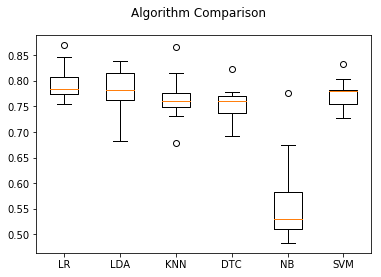

In [185]:
# Compare different models performance on data set

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
    

X = df_listings_scaled.iloc[:, :-1]
y = df_listings_scaled.iloc[:,-1]


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* The above box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.
* The Plot shows that the box size for SVM is small with a good accuracy. Hence choosing SVM in this case.


#### Ques 1: Most important feature affecting rental price ?

No. of Features:  181


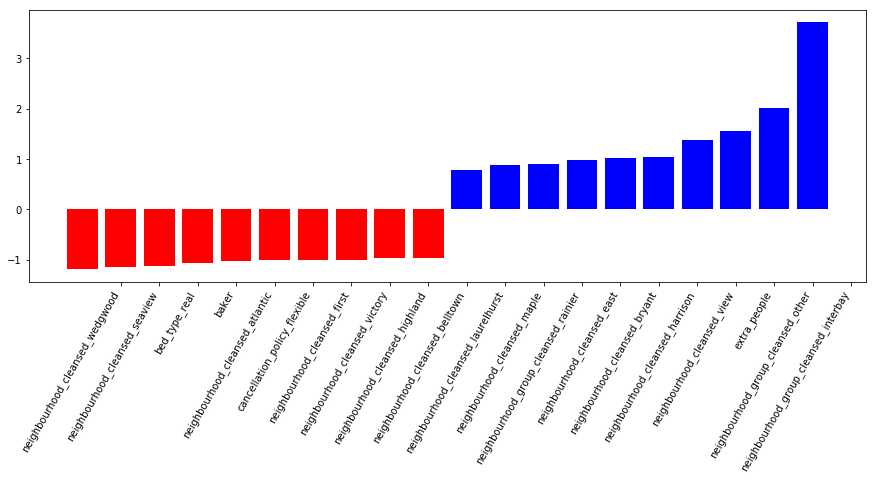

In [187]:
# function to plot most important and least important features

def plot_coefficients(classifier, feature_names, top_features=10):
    '''
    This function plots the top n most import features and n least important features
    
    Parameters:
    classifier: trained model 
    feature_name (list): list of feature labels
    top_features (int): number of important/least important features to find
    
    Retruns:
    Plots a chart to represent the contribution of top important features and 
    top least important features
    '''
    
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

cv = CountVectorizer()
cv.fit(df_listings_scaled)
print('No. of Features: ',len(cv.vocabulary_))
#print(cv.get_feature_names())

labels = df_listings_scaled.iloc[:,-1]
train1 = df_listings_scaled.drop('price_label', axis=1)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.30, random_state = 2)

svm = svm.SVC(kernel='linear')
svm.fit(train1, labels)

plot_coefficients(svm, cv.get_feature_names())

#### Observations

* Neighbourhood group cleansed (means Neighbourhood) is the key feature for rent price.

#### Ques 2: Top three neighbourhoods having highest rental price ?

In [198]:
# calculate find mean price by grouping over "neighbourhood_group_cleansed"
df_neigh_price = df_listings[['neighbourhood_group_cleansed','price']]
df_neigh_price['price'] = df_neigh_price['price'].apply(lambda p: str(p).replace('$','').replace(',','')).astype(float)
df_neigh_price_grouped = df_neigh_price.groupby('neighbourhood_group_cleansed', as_index=False)['price'].mean()

roundup = (lambda x: round(x,0))
df_neigh_price_grouped['price'] = df_neigh_price_grouped['price'].apply(roundup)
df_neigh_price_grouped.sort_values('price',ascending=False, inplace=True)
df_neigh_price_grouped

,neighbourhood_group_cleansed,price
9,Magnolia,178.0
12,Queen Anne,157.0
6,Downtown,154.0
16,West Seattle,141.0
3,Cascade,140.0
2,Capitol Hill,131.0
4,Central Area,128.0
0,Ballard,125.0
11,Other neighborhoods,120.0
7,Interbay,110.0


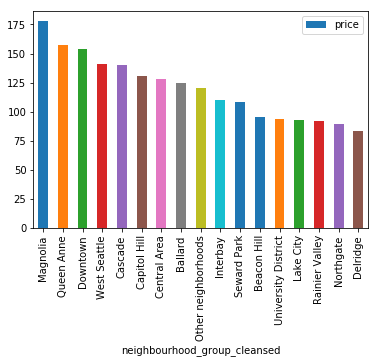

In [199]:
# plot bar chart to represent mean price for each "neighbourhood_group"
ax = df_neigh_price_grouped.plot.bar(x='neighbourhood_group_cleansed', y='price', rot=90)

#### Observations:

##### Top 3 neighbourhood having highest mean price:
- Magnolia: mean price \$178.
- Queen Anne: mean price \$157.
- Downtown: mean price \$154.

#### Top 3 neighbourhood having low mean price:
- Delridge: mean price \$83.
- Northgate: mean price \$89.
- Rainier Valley: mean price \$92.

#### Ques 3: Top three months having the highest rental price ?

In [200]:
# load clean calendar data set to pickle file
df_calendar_clean = pd.read_pickle('calendar_clean.pkl')

In [211]:
### Weekday vs Mean Price
mean_price_weekday = pd.DataFrame(df_calendar_clean[df_calendar_clean['available'] == True].groupby('day-of-week')['price'].mean())
roundup = (lambda x: round(x,0))
mean_price_weekday['price'] = mean_price_weekday['price'].apply(roundup)
mean_price_weekday.sort_values(['price'], ascending=False, inplace=True)
mean_price_weekday

,price
day-of-week,
Friday,143.0
Saturday,143.0
Monday,136.0
Sunday,136.0
Thursday,136.0
Tuesday,135.0
Wednesday,135.0


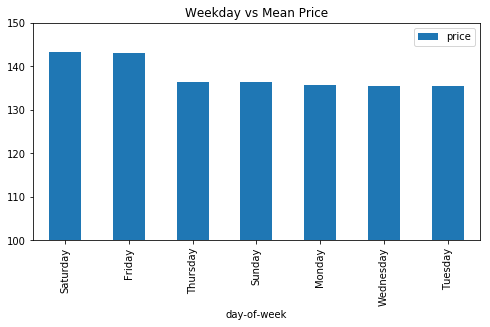

In [201]:
# plot bar chart to represent the mean price vs weekdays
ax = mean_price_weekday[['price']].plot(kind='bar', ylim=(100,150), title ="Weekday vs Mean Price", figsize=(8, 4), legend=True, fontsize=10)

#### Observations:

* Mean price for Friday and Saturday (\$143) are higher than other weekdays (around \$136).

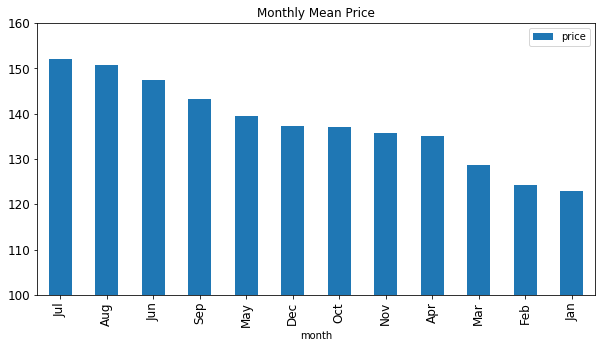

In [202]:
# Mean Price vs Month
mean_price_month = pd.DataFrame(df_calendar_clean[df_calendar_clean['available'] == True].groupby('month')['price'].mean())
mean_price_month.sort_values(['price'], ascending=False, inplace=True)
ax = mean_price_month[['price']].plot(kind='bar', ylim=(100,160),title ="Monthly Mean Price", figsize=(10, 5), legend=True, fontsize=12)

#### Observations:

* The mean price for the months June, July and August are higer than rest of the months.
* January and February and March months are having the lowest mean price.
* The rental prices are higher in Summer season compared to rest of the seasons.
* The rental prices are lower in Winter season (specially in January and February) compared to rest of the seasons.

#### Ques 4: Keywords to write a attractive description ?

In [209]:
# create function to generate word cloud to represent the most occuring words in a Series of dataframe 

def create_wordcloud(data, feature):
    '''
    This function extracts most occuring words from a series, generates a word cloud as image.
    
    Parameters:
    data (pandas dataframe): dataset
    feature (string): column name to extract the keywords from
    
    Retuns:
    displays an image of word cloud with keyword size as per the frequency of their occurance
    
    '''
        
    text = data[feature].values

    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (30, 20),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

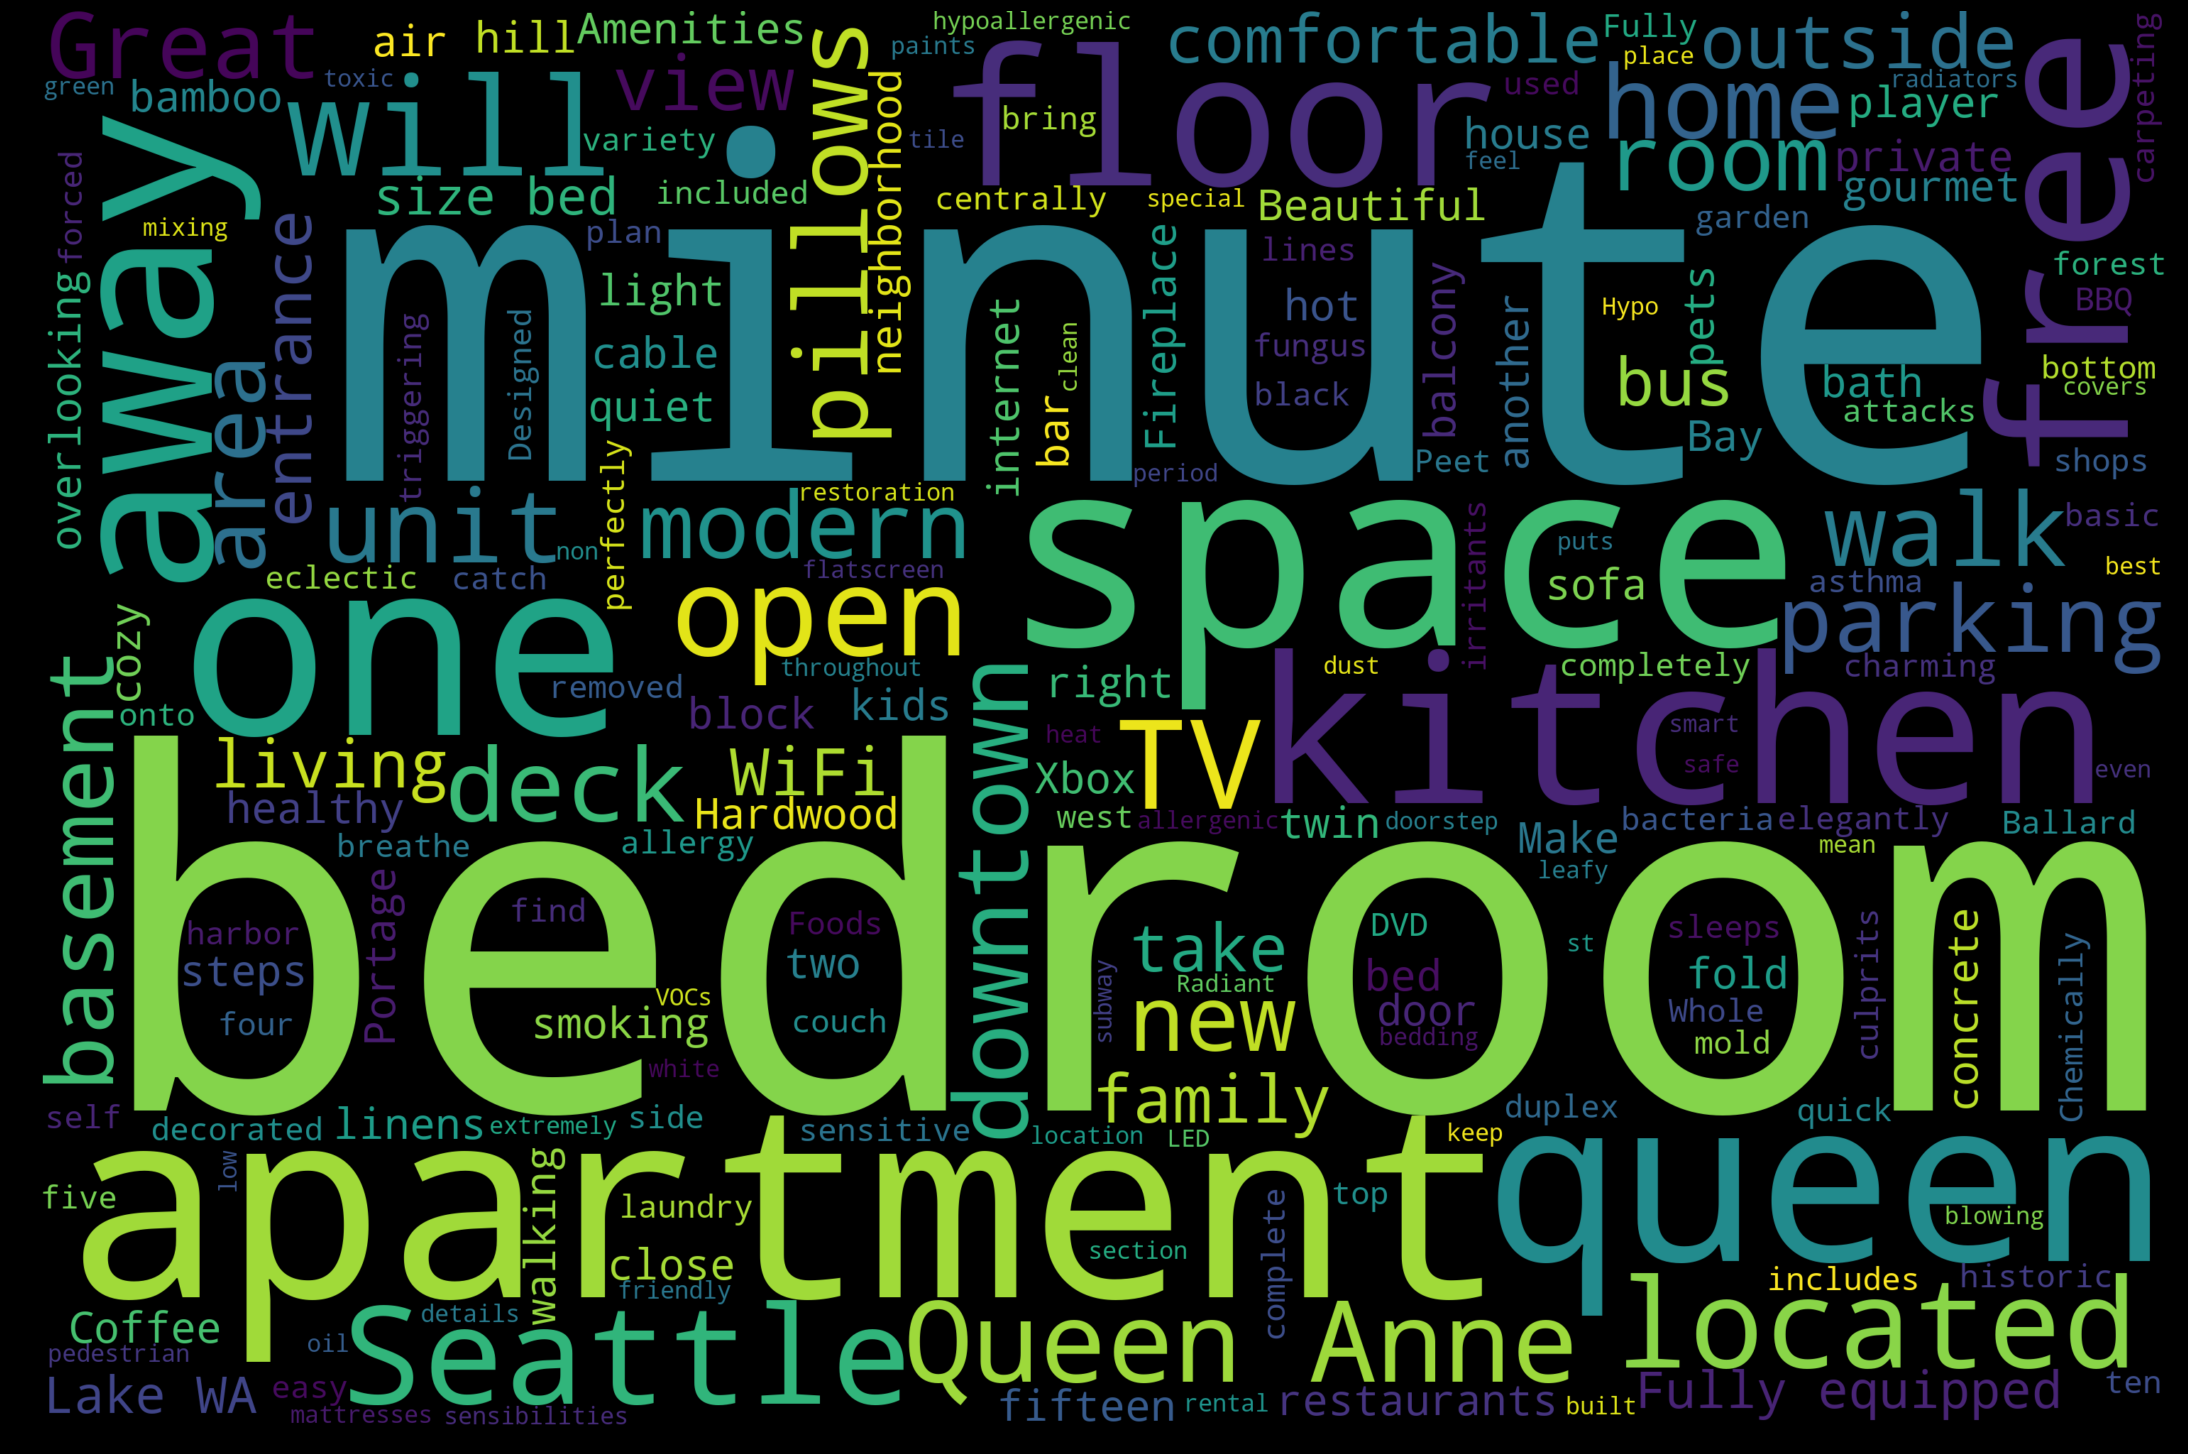

In [210]:
# generate word clod for important keywords to write an attractive description for listings
create_wordcloud(df_descriptive_features, 'description')

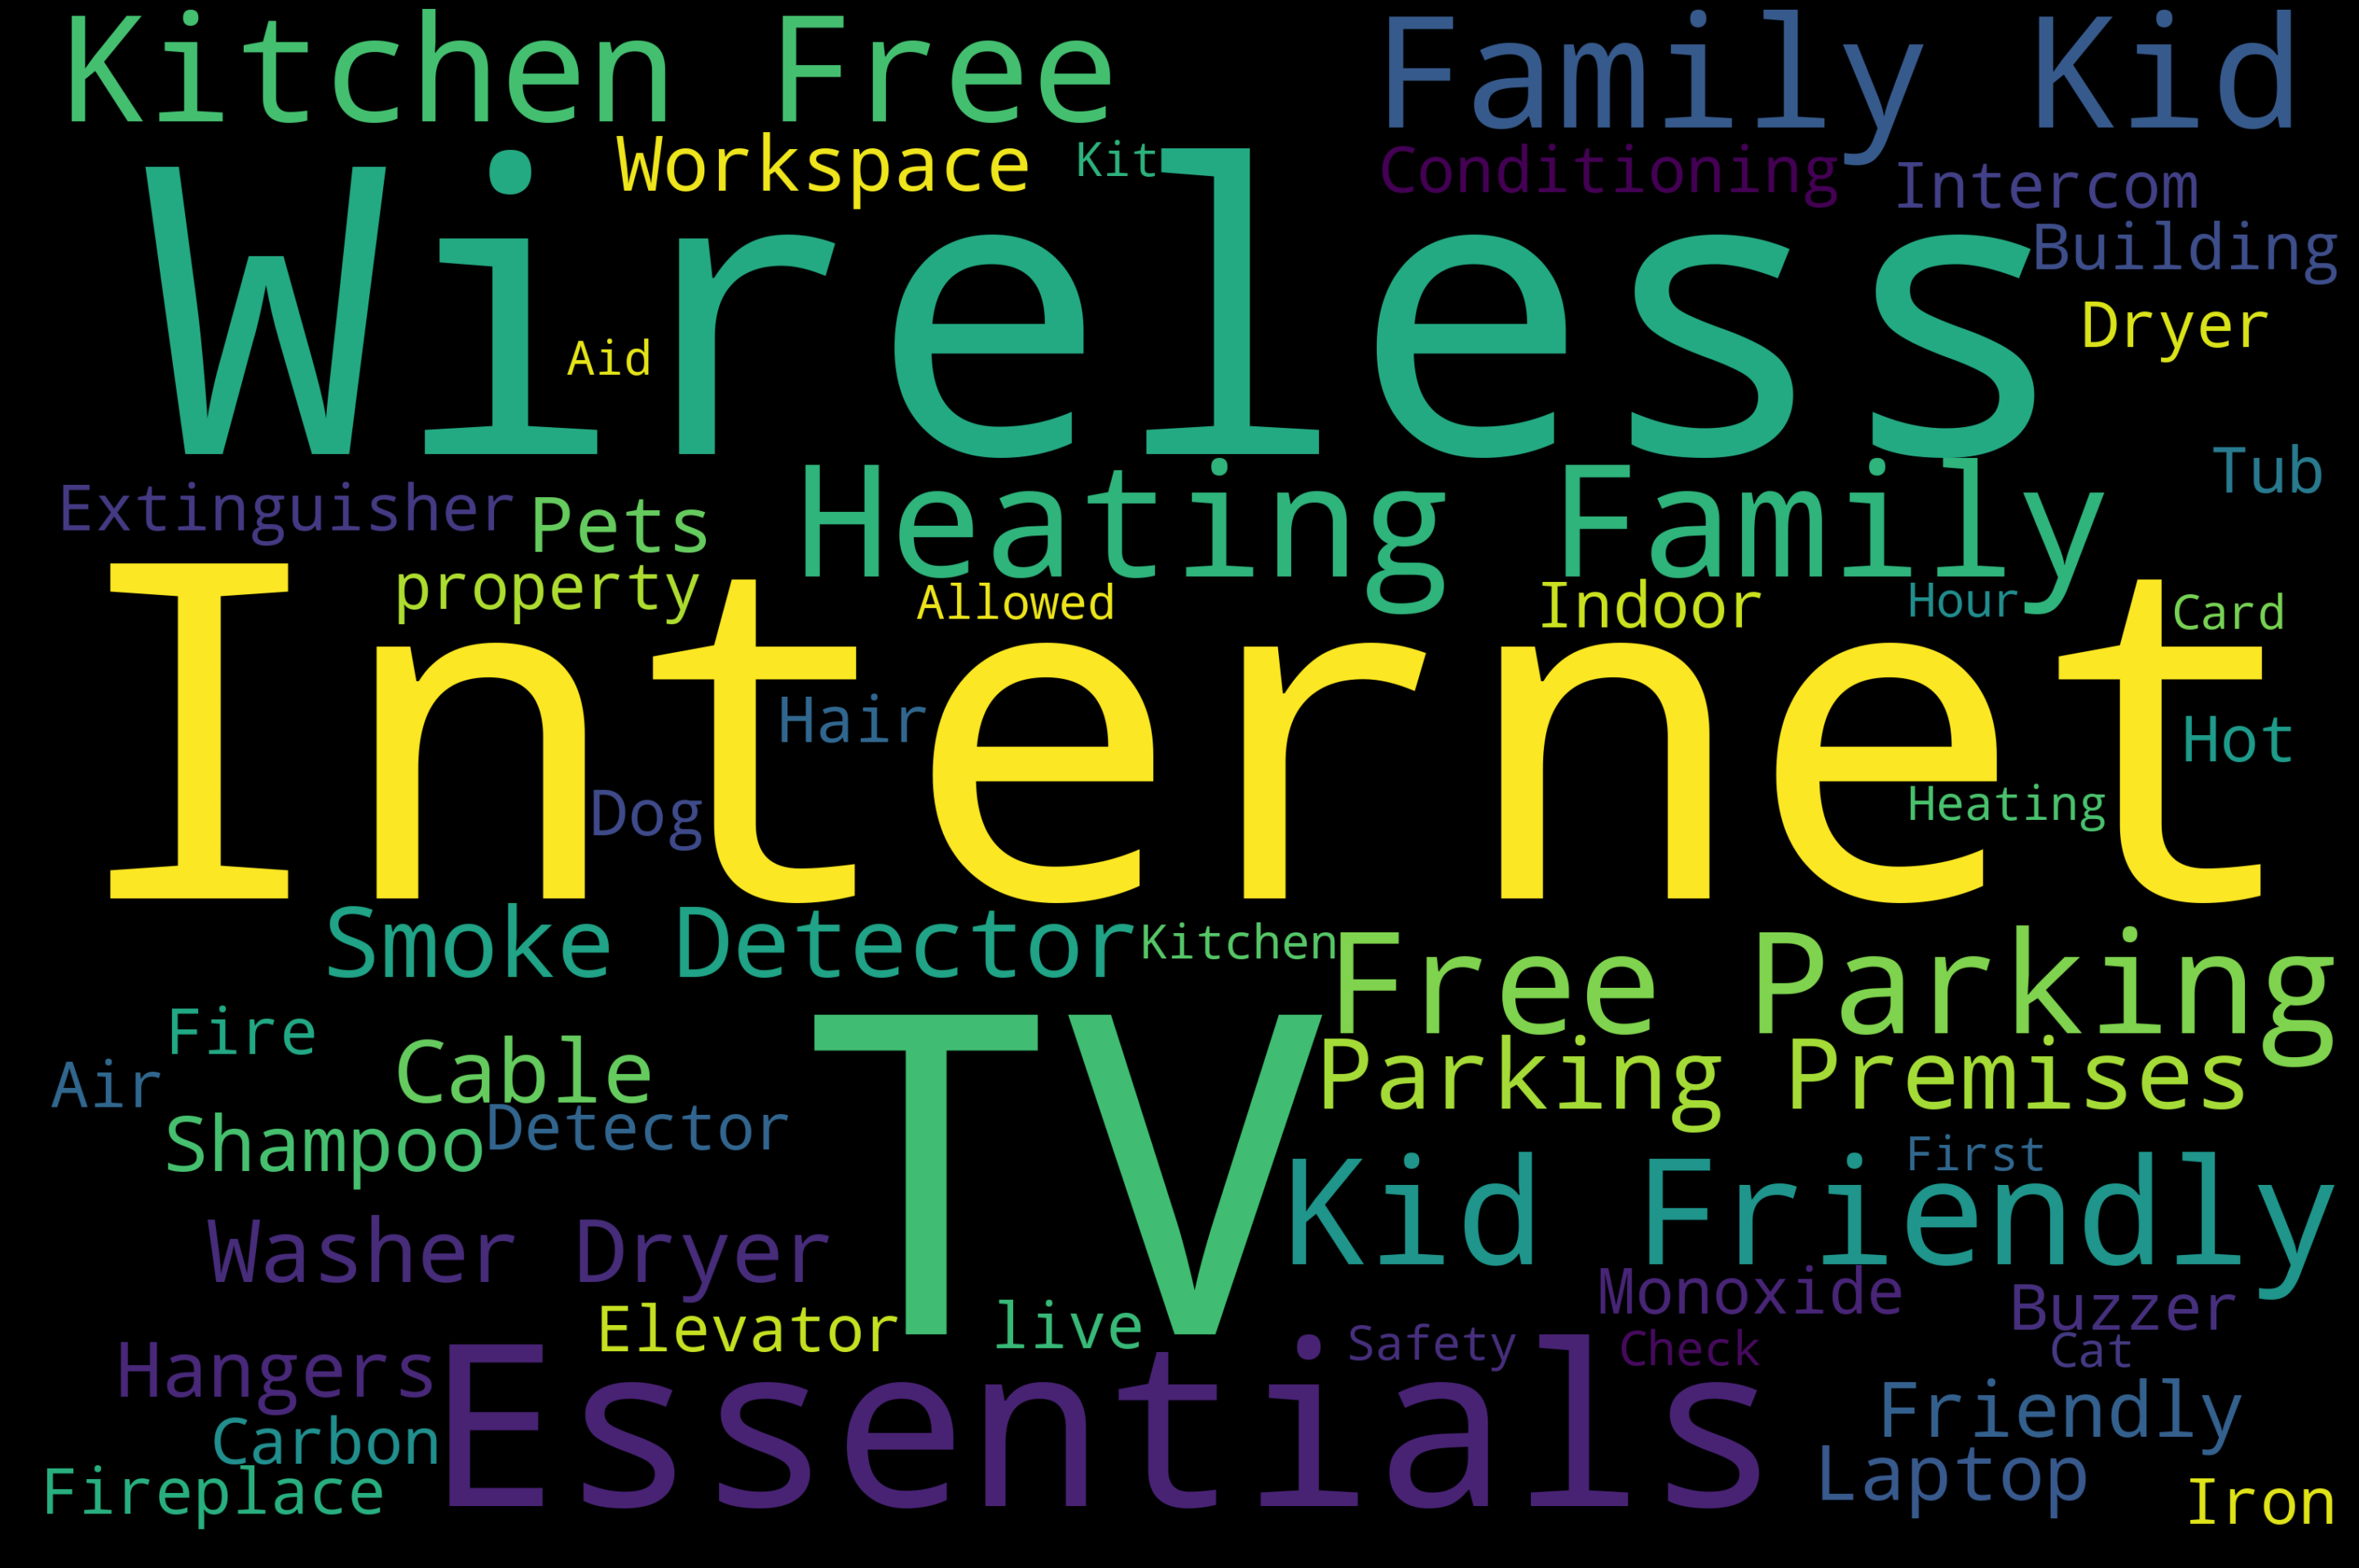

In [206]:
# generate word clod for important key amenities to attract quests
create_wordcloud(df_descriptive_features, 'amenities')

### Conclusion

**Most important features**
- Neighbourhood (neighbourhood_group_cleansed is derived from neighbourhood).

**Top 3 neighbourhood having highest average price:**
- Magnolia: having average price \$176.
- Queen Anne: having average price \$152.
- Downtown: having average price \$151.

**Top 3 neighbourhood having low mean price:**
- Delridge: mean price \$83.
- Northgate: mean price \$89.
- Rainier Valley: mean price \$92.

**Weekdays having higher mean price:**
- Mean price for Friday and Saturday (\$143) are higher than other weekdays (around \$136).

**Mean price comparison between months:**
- The mean price for the months June, July and August are higer than rest of the months.
- January and February and March months are having the lowest mean price.
- The rental prices are higher in Summer season compared to rest of the seasons.
- The rental prices are lower in Winter season (specially in January and February) compared to rest of the seasons.